# **Hierarchical Clustering**

CRIME DATA SET


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
rawdata=pd.read_csv('/content/crime_data (1).csv')

In [3]:
df=rawdata.copy()

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)
  

In [8]:
df_norm=norm_func(df.iloc[:,1:])

In [9]:
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


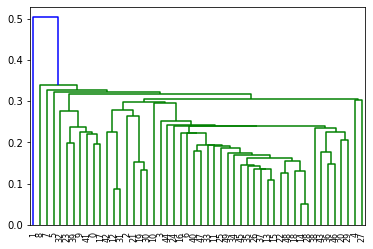

In [10]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

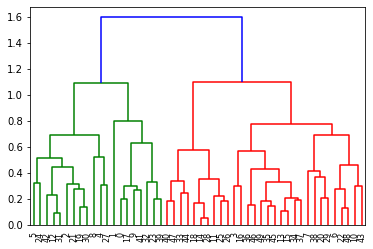

In [11]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

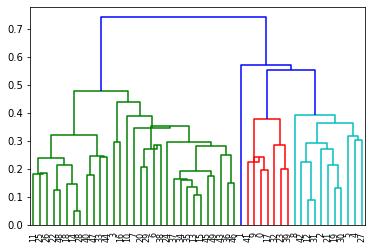

In [12]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='centroid'))

In [13]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')

In [14]:
y_hc=hc.fit_predict(df_norm)

In [15]:
y_hc

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [16]:
df['clusterid']=y_hc

In [17]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [18]:
df.groupby('clusterid').count()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
clusterid,,,,,
0,30,30,30,30,30
1,20,20,20,20,20


#               **K-MEANS CLUSTERING**

In [19]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

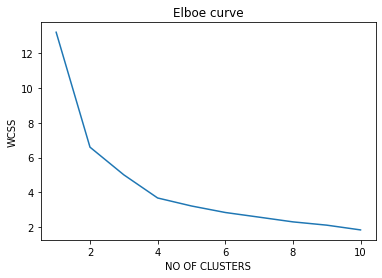

In [20]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elboe curve')
plt.xlabel('NO OF CLUSTERS')
plt.ylabel('WCSS')
plt.show()

In [21]:
model=KMeans(n_clusters=6)
model.fit(df_norm)
model.labels_


array([1, 5, 3, 4, 3, 3, 0, 4, 3, 1, 0, 2, 3, 4, 2, 4, 4, 1, 2, 3, 0, 3,
       2, 1, 4, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 4, 4, 0, 0, 1, 2, 1, 3, 0,
       2, 4, 0, 2, 2, 4], dtype=int32)

In [22]:
md=pd.Series(model.labels_)
df['kClusterid']=md
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid,kClusterid
0,Alabama,13.2,236,58,21.2,1,1
1,Alaska,10.0,263,48,44.5,1,5
2,Arizona,8.1,294,80,31.0,1,3
3,Arkansas,8.8,190,50,19.5,0,4
4,California,9.0,276,91,40.6,1,3


In [25]:
df.iloc[:,:].groupby('kClusterid').mean()

,Murder,Assault,UrbanPop,Rape,clusterid
kClusterid,,,,,
0,4.955556,125.444444,80.111111,17.788889,0.0
1,14.671429,251.285714,54.285714,21.685714,1.0
2,3.091667,76.000000,52.083333,11.833333,0.0
3,11.054545,264.090909,79.090909,32.618182,1.0
4,7.340000,157.000000,63.300000,20.440000,0.1
5,10.000000,263.000000,48.000000,44.500000,1.0


In [28]:
k_labels = np.unique(md)
k_labels

array([0, 1, 2, 3, 4, 5], dtype=int32)

## DBSCAN

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
dbs=[]
a=[0.2,0.3,0.5,0.6,0.7,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
for i in a:
  
  dbscan=DBSCAN(eps=i,min_samples=5)
  dbscan.fit(df_norm)
  dbs.append(dbscan.labels_)

In [34]:
dbs_ser=pd.Series(dbs)


In [35]:
dbs_df=pd.DataFrame(dbs_ser)

In [36]:
dbs_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
0,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0...","[0, -1, -1, 1, -1, -1, 1, -1, -1, 0, 1, 1, -1,...","[0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [40]:
dbs1=[]
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(df_norm)
dbs1.append(dbscan.labels_)

In [41]:
dbs1

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])]

In [46]:
dbs1

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])]

In [48]:
cl=pd.DataFrame(dbscan.labels_,columns=['dbscluster'])
pd.concat([df,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid,kClusterid,dbscluster
0,Alabama,13.2,236,58,21.2,1,1,0
1,Alaska,10.0,263,48,44.5,1,5,0
2,Arizona,8.1,294,80,31.0,1,3,0
3,Arkansas,8.8,190,50,19.5,0,4,0
4,California,9.0,276,91,40.6,1,3,0
5,Colorado,7.9,204,78,38.7,1,3,0
6,Connecticut,3.3,110,77,11.1,0,0,0
7,Delaware,5.9,238,72,15.8,0,4,0
8,Florida,15.4,335,80,31.9,1,3,0
9,Georgia,17.4,211,60,25.8,1,1,0
